In [1]:
# SETUP SLEEPY
import os
os.chdir('../../')

In [2]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['verbose']=False

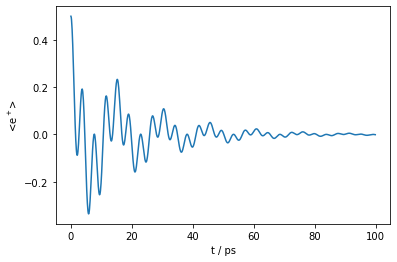

In [31]:
ex0=sl.ExpSys(200,Nucs=['e','1H'],LF=True)
ex0.set_inter('g',i=0,gxx=1,gyy=1,gzz=1)
aiso=5e5
ex0.set_inter('hyperfine',i0=0,i1=1,Axx=aiso,Ayy=aiso,Azz=aiso)
ex1=ex0.copy()
ex1.set_inter('g',i=0,gxx=4,gyy=4,gzz=4)

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(1e-11))

seq=L.Sequence(Dt=1e-13)

rho=sl.Rho('ex','ep').DetProp(seq,n=1000).plot()

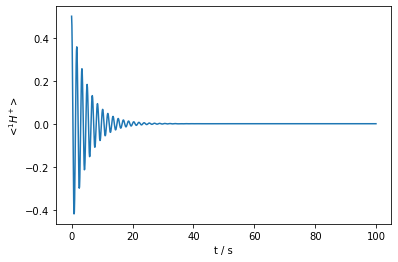

In [32]:
seq=L.Sequence(Dt=.1)
rho=sl.Rho('1Hx','1Hp').DetProp(seq,n=1000).plot()

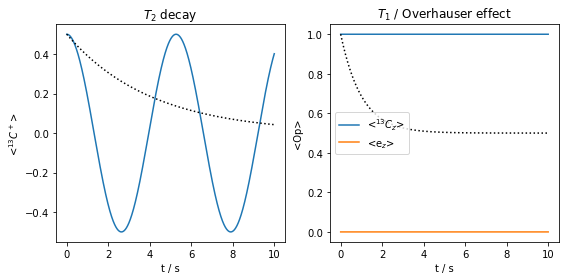

In [90]:
ex=sl.ExpSys(v0H=500,Nucs=['13C','e-'],LF=True,pwdavg='alpha0beta45',vr=0)
aiso=5e5
ex.set_inter(Type='hyperfine',i0=0,i1=1,Axx=aiso,Ayy=aiso,Azz=aiso)    #Hyperfine coupling

L=ex.Liouvillian()

L.add_relax('T2',i=1,T2=1e-13,OS=True)

Lref=ex.Liouvillian().add_relax('T2',i=1,T2=1e-13)
seq=L.Sequence(Dt=1.0e-3)

rho=sl.Rho('13Cx+13Cz',['13Cp','13Cz','ez'])
_=rho.DetProp(seq,n=10000)

rho.downmix()
T1=2.03
ax=plt.subplots(1,2,figsize=[9,4])[1]
rho.plot(axis='s',det_num=0,ax=ax[0])
ax[0].set_title('$T_2$ decay')
ax[0].plot(rho.t_axis,0.5*np.exp(-rho.t_axis/(T1*2)),color='black',linestyle=':')
rho.plot(axis='s',det_num=[1,2],ax=ax[1])
ax[1].set_title(r'$T_1$ / Overhauser effect')
_=ax[1].plot(rho.t_axis,np.exp(-rho.t_axis/(T1/2))*0.5+0.5,color='black',linestyle=':')

<AxesSubplot:>

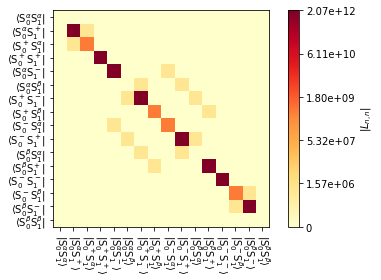

In [97]:
# Lref._Lrelax-=L[0].LrelaxOS(0)
Lref.plot('Lcoh',mode='log')

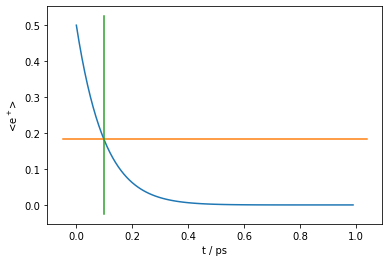

In [80]:
seq=L.Sequence(1e-14)
ax=sl.Rho('ex','ep').DetProp(seq,n=100).plot()
ax.plot(ax.get_xlim(),[0.5/np.e,0.5/np.e])
ax.plot([0.1,0.1],ax.get_ylim())

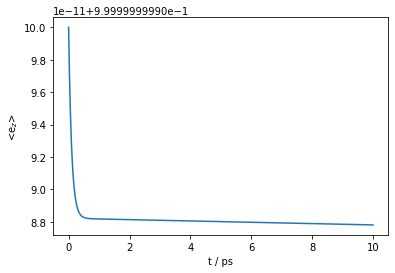

In [78]:
seq=L.Sequence(1e-14)
ax=sl.Rho('ez','ez').DetProp(seq,n=1000).plot()

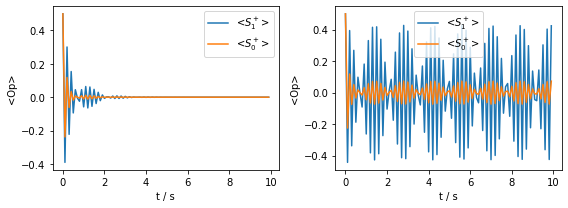

In [122]:
fig,ax=plt.subplots(1,2,figsize=[8,3])

ex=sl.ExpSys(v0H=500,Nucs=['1H','1H'])
ex.set_inter('J',i0=0,i1=1,J=50)
ex.set_inter('CS',i=0,Hz=50)

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=.1,OS=False)
_=sl.Rho('1Hx',['S1p','S0p']).DetProp(L.Sequence(.1),n=100).plot(ax=ax[0])

L.clear_relax()
L.add_relax('T2',i=0,T2=.1,OS=True)
_=sl.Rho('1Hx',['S1p','S0p']).DetProp(L.Sequence(.1),n=100).plot(ax=ax[1])
fig.tight_layout()

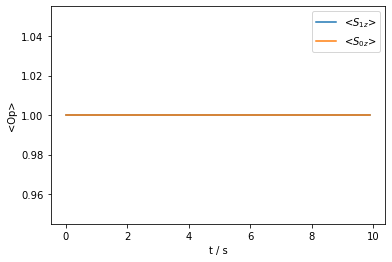

In [124]:
ex=sl.ExpSys(v0H=500,Nucs=['1H','1H'])
ex.set_inter('J',i0=0,i1=1,J=50)
ex.set_inter('CS',i=0,Hz=50)

L=ex.Liouvillian()
L.add_relax('T2',i=0,T2=.1,OS=False)
_=sl.Rho('1Hz',['S1z','S0z']).DetProp(L.Sequence(.1),n=100).plot()